In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()

plt.rc("font", family = font_name)

import matplotlib as mlp

## rc is remote control?

mlp.rcParams["axes.unicode_minus"] = False

##Params: Parameters


In [34]:
gdp = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-12\\gdp_2.csv", index_col = [0, 1], header=[0, 1])
#print(gdp)

gdp_1 = gdp.loc[(slice(None), '1인당 지역총소득'), :]
#print(gdp_1)

gdp_2 = gdp_1.T

#d = gdp_1[[('서울특별시', '증감률'), ('인천광역시', '증감률')]]

gdp_3 = gdp_2.iloc[2: : 3]

gdp_3.replace('-', np.nan, inplace=True)

gdp_3.fillna(0, inplace=True)

gdp_3 = gdp_3.astype(float)

#print(gdp_3)

gdp_3.columns = gdp_3.columns.droplevel(level=1)

gdp_3.index = gdp_3.index.droplevel(level= 1)

#gdp_3= gdp_3.drop("세종특별자치시")

gdp_3 = gdp_3.T

gdp_3.rename(index= {'2021 p)': "2021"}, inplace = True)

gdp_3= gdp_3.T
gdp_3


a = gdp_3.loc[:, '2021']

a

C:\Users\acorn\AppData\Local\Temp\ipykernel_19028\650936146.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_3.replace('-', np.nan, inplace=True)
C:\Users\acorn\AppData\Local\Temp\ipykernel_19028\650936146.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_3.fillna(0, inplace=True)


시점
전국          7.2
서울특별시      10.6
부산광역시       8.0
대구광역시       5.1
인천광역시       9.5
광주광역시       4.2
대전광역시       5.4
울산광역시      10.1
세종특별자치시     4.9
경기도         5.6
강원도         6.8
충청북도        7.1
충청남도        8.2
전라북도        5.6
전라남도        0.7
경상북도        7.1
경상남도        4.5
제주특별자치도     6.6
Name: 2021, dtype: float64

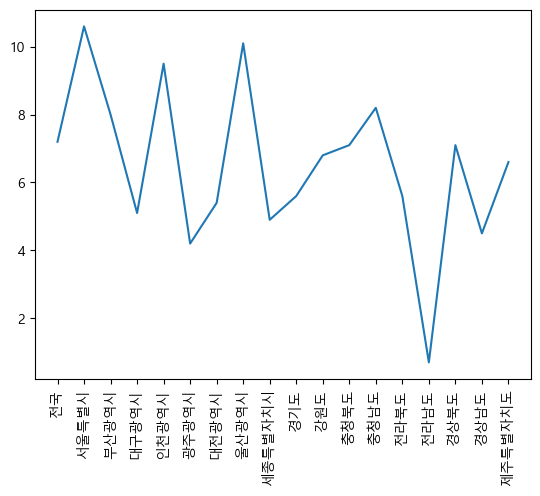

In [35]:
plt.xticks(rotation = 'vertical')
plt.plot(a.index, a.values)

In [29]:
br = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-13\\br_2021.csv", index_col = [0], header=[0, 1])
#print(br)
br.columns = br.columns.droplevel(0)

br

br = br.loc[:,"합계출산율" ]

br #### 2021 자료



print(br)


전국         0.808
서울특별시      0.626
부산광역시      0.728
대구광역시      0.785
인천광역시      0.778
광주광역시      0.896
대전광역시      0.810
울산광역시      0.940
세종특별자치시    1.277
경기도        0.853
강원도        0.979
충청북도       0.949
충청남도       0.963
전라북도       0.850
전라남도       1.017
경상북도       0.966
경상남도       0.903
제주특별자치도    0.951
Name: 합계출산율, dtype: float64


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that gdp_3 and br are pandas series with the same 17 regions as index

# Combine the two series into a pandas DataFrame
df = pd.concat([a, br], axis=1)

# Drop any rows with missing values
#df = df.dropna()

# Create a scatterplot with a regression line
sns.regplot(x=df['2021'], y=df['합계출산율'])

# Set the x-axis and y-axis labels
plt.xlabel('시도별 1인당 지역총소득')
plt.ylabel('출산율')
plt.title("2021 GNI per capita of each region vs Birth Rate")

# Show the plot
plt.show()


#np.corrcoef(df["2021"], df["합계출산율"])[0,1]



KeyError: '합계출산율'

In [47]:
br = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-12\\br_c.csv", index_col = [0], header=[0, 1])
#print(br)

br_t = br.T

br_t
br_2 = br_t.iloc[2: : 3]
br_2

br_f= br_2.T

br_f.fillna(0, inplace=True)

br_f.columns = br_f.columns.droplevel(level= 1)

#br_f = br_f.drop("세종특별자치시")


print(br_f)




시군구별     2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
전국        4.3  -8.5   1.5   2.8  -5.4 -10.2  -7.1  -6.0  -8.8  -3.5
서울특별시     4.4  -8.6   1.5   1.8  -6.1 -11.1  -9.0  -5.8 -10.5  -2.5
부산광역시     5.3  -7.6   3.9   4.5  -3.9 -10.9  -7.9  -8.0  -9.7  -2.5
대구광역시     6.2  -7.4   3.7   4.0  -2.5 -10.0  -7.5  -5.6 -13.4  -2.7
인천광역시     5.6  -8.1   1.4   0.3  -5.9 -12.0  -0.1  -6.6 -11.8  -6.2
광주광역시     4.9  -9.7   2.5   0.7  -3.2  -9.8  -7.7  -6.1 -11.2  10.5
대전광역시     4.3  -6.2   1.3   2.2  -6.7  -9.8 -11.4  -7.2  -8.8   0.6
울산광역시     6.3  -6.1   3.3   3.4  -4.6 -11.1 -10.3  -4.2  -9.2  -4.5
세종특별자치시   0.0 -10.1  -5.6  39.8  -3.8  -8.4  -6.1  -6.0 -13.2   0.0
경기도       3.1  -9.5   1.2   2.5  -6.1 -10.5  -6.3  -5.9  -6.9  -2.8
강원도       2.7  -9.1  -0.1   5.0  -5.6  -9.2  -5.0   1.4  -4.3  -5.5
충청북도      4.0  -8.1  -0.1   3.7  -4.0  -9.1  -5.1 -10.4  -6.4  -3.5
충청남도      5.0  -8.2  -1.5   4.2  -5.7  -8.5  -7.1  -6.2  -7.5  -6.4
전라북도      2.5  -8.3   0.7   1.7  -7.5  -8.0  -9.

In [49]:
br = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-12\\br_t.csv", index_col = [0], header=[0])
#print(br)



###
br

#br_2 = br_t.iloc[2: :3]
#br_2

#br_f= br_2.T

#br_f.fillna(0, inplace=True)

##br_f.columns = br_f.columns.droplevel(level= 1)

#3br_f = br_f.drop("세종특별자치시")


#print(br_f)
###

2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
시군구별                                                                         
전국       1.297  1.187  1.205  1.239  1.172  1.052  0.977  0.918  0.837  0.808
서울특별시    1.059  0.968  0.983  1.001  0.940  0.836  0.761  0.717  0.642  0.626
부산광역시    1.135  1.049  1.090  1.139  1.095  0.976  0.899  0.827  0.747  0.728
대구광역시    1.217  1.127  1.169  1.216  1.186  1.067  0.987  0.932  0.807  0.785
인천광역시    1.301  1.195  1.212  1.216  1.144  1.007  1.006  0.940  0.829  0.778
광주광역시    1.295  1.170  1.199  1.207  1.168  1.053  0.972  0.913  0.811  0.896
대전광역시    1.315  1.234  1.250  1.277  1.192  1.075  0.952  0.883  0.805  0.810
울산광역시    1.481  1.391  1.437  1.486  1.418  1.261  1.131  1.084  0.984  0.940
세종특별자치시  1.597  1.435  1.354  1.893  1.821  1.668  1.566  1.472  1.277  1.277
경기도      1.355  1.226  1.241  1.272  1.194  1.069  1.002  0.943  0.878  0.853
강원도      1.374  1.249  1.248  1.311  1.237  1.123  1.067  1.082  1.036  0.979
충청북도     1.485  1.365  1.363  1.414  1.358  1.235  1.172  1.050  0.983  0.949
충청남도     1.571  1.442  1.421  1.480  1.395  1.276  1.186  1.112  1.029  0.963
전라북도     1.440  1.320  1.329  1.352  1.251  1.151  1.044  0.971  0.909  0.850
전라남도     1.642  1.518  1.497  1.549  1.466  1.325  1.240  1.234  1.145  1.017
경상북도     1.489  1.379  1.408  1.464  1.396  1.256  1.167  1.089  1.003  0.966
경상남도     1.503  1.367  1.409  1.437  1.358  1.227  1.122  1.046  0.945  0.903
제주특별자치도  1.598  1.427  1.481  1.477  1.432  1.305  1.220  1.145  1.021  0.951

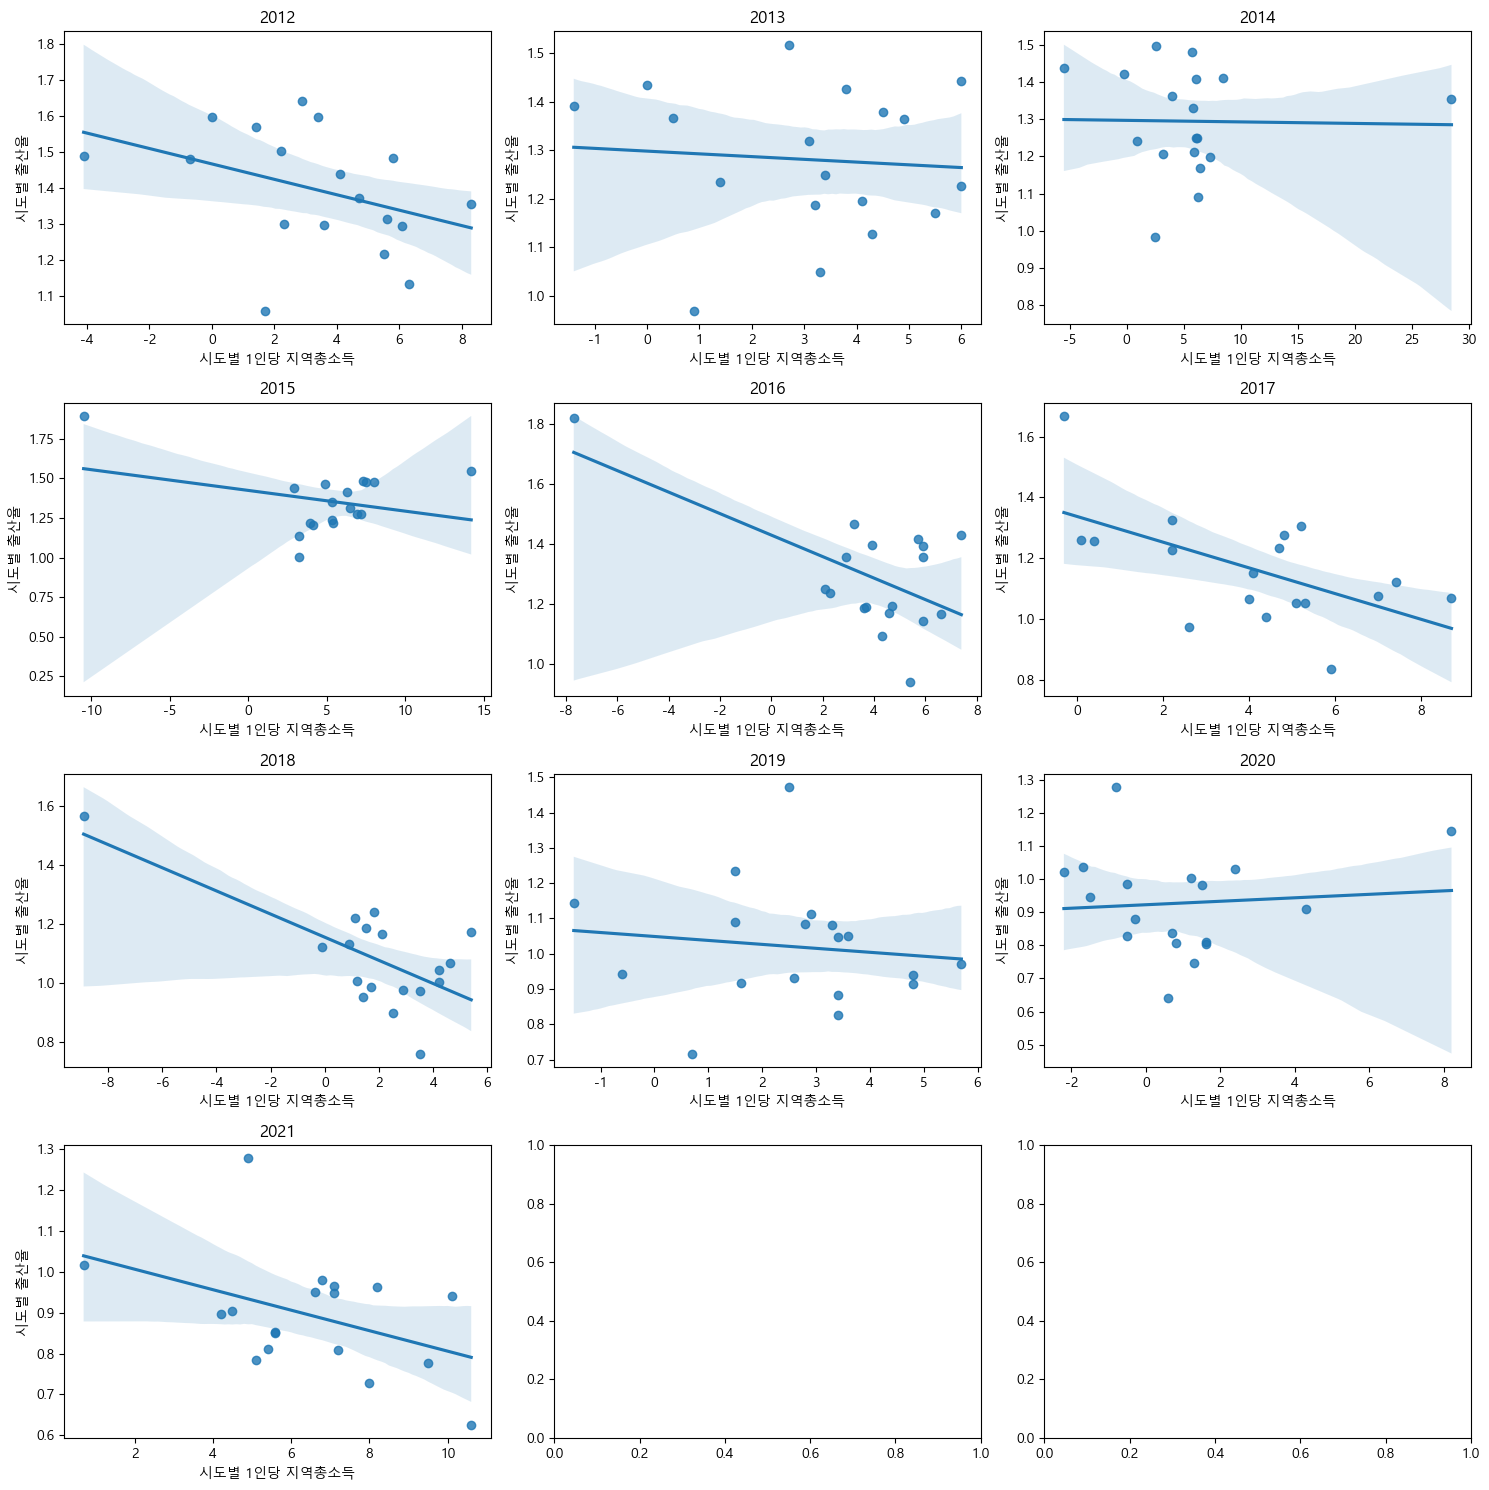

In [70]:

### 시도별 GDP Per Capita of Each Region vs 시도별 합계출산율


li = []

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axs = axs.flatten()

for i, year in enumerate(range(2012, 2022)):
    
    gdp_data = gdp_3[str(year)]
    br_data = br[str(year)]
    
    sns.regplot(x = gdp_data, y=br_data, scatter = True, ax=axs[i])
    axs[i].set_title("{}".format(year))
    axs[i].set_xlabel("시도별 1인당 지역총소득")
    axs[i].set_ylabel("시도별 출산율")
    li.append(np.corrcoef(gdp_data, br_data)[0][1])
    #plt.text(2, 1.5, "안녕")

    
    
plt.tight_layout()
plt.show()

    


In [61]:
type(li)

avg = sum(li)/len(li)

avg

-0.31512057817342787

In [62]:
br_data

시군구별
전국         0.808
서울특별시      0.626
부산광역시      0.728
대구광역시      0.785
인천광역시      0.778
광주광역시      0.896
대전광역시      0.810
울산광역시      0.940
세종특별자치시    1.277
경기도        0.853
강원도        0.979
충청북도       0.949
충청남도       0.963
전라북도       0.850
전라남도       1.017
경상북도       0.966
경상남도       0.903
제주특별자치도    0.951
Name: 2021, dtype: float64

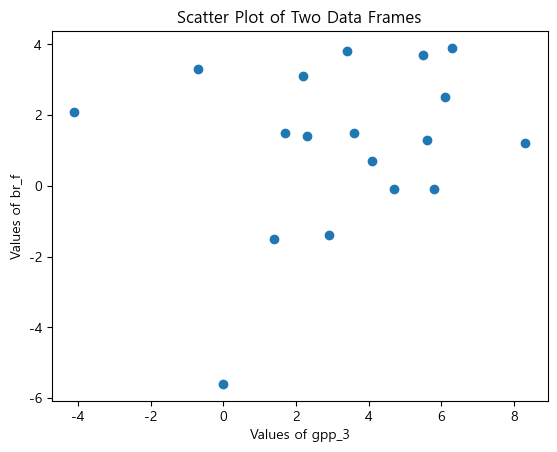

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# create two sample data frames

# create a scatter plot with df1 values on x-axis and df2 values on y-axis
plt.scatter(gdp_3['2012'], br_f['2014'])

# add labels and title

plt.xlabel('Values of gpp_3')
plt.ylabel('Values of br_f')
plt.title('Scatter Plot of Two Data Frames')

# display the plot
plt.show()


In [64]:
# create a list of years
years = range(2012, 2020)



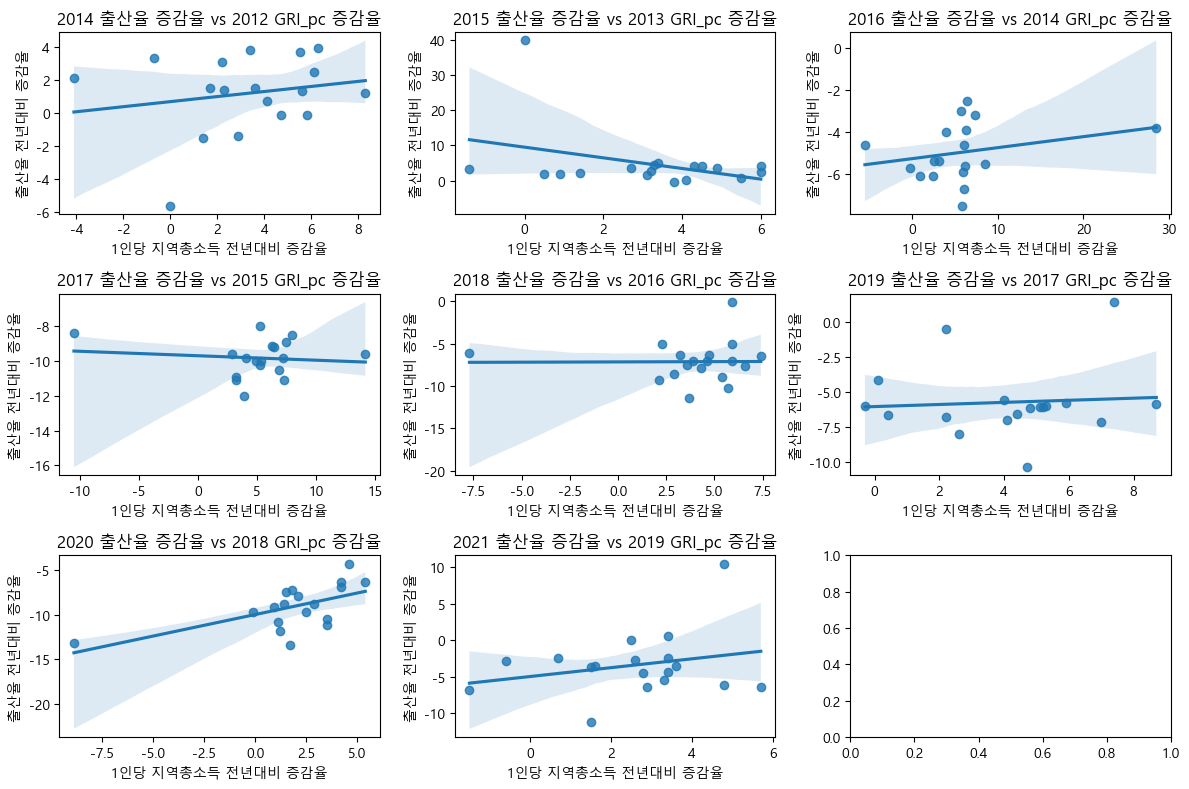

In [136]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

for i, year in enumerate(years):
    row, col = i // 3, i % 3
    
    sns.regplot(x=gdp_3[str(year)], y=br_f[str(year+2)], ax=axs[row, col])
    axs[row, col].set_xlabel('1인당 지역총소득 전년대비 증감율')
    axs[row, col].set_ylabel('출산율 전년대비 증감율')
    axs[row, col].set_title(f'{year+2} 출산율 증감율 vs {year} GRI_pc 증감율')

#handles, labels = axs[-1, -1].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower center', ncol=len(br_f), fontsize='small')
    
# adjust spacing and layout
plt.tight_layout()

# show the plot
plt.show()



## 팀장님이 주신 corrcoef 하는 방법
#plt.title("OECD 국가별 1인당 GDP($) - 출산율")
#np.corrcoef(og["1인당GDP($)"], og["출산율"])[0,1]


# 세종 포함




In [18]:
li = []


li.append(np.corrcoef(gdp_3["2012"], br_f["2014"])[0][1])
li.append(np.corrcoef(gdp_3["2013"], br_f["2015"])[0][1])
li.append(np.corrcoef(gdp_3["2014"], br_f["2016"])[0][1])
li.append(np.corrcoef(gdp_3["2015"], br_f["2017"])[0][1])
li.append(np.corrcoef(gdp_3["2016"], br_f["2018"])[0][1])
li.append(np.corrcoef(gdp_3["2017"], br_f["2019"])[0][1])
li.append(np.corrcoef(gdp_3["2018"], br_f["2020"])[0][1])
li.append(np.corrcoef(gdp_3["2019"], br_f["2021"])[0][1])

np.mean(li)


0.11383858415914512

In [19]:
li = []

li.append(np.corrcoef(gdp_3["2012"], br_f["2015"])[0][1])
li.append(np.corrcoef(gdp_3["2013"], br_f["2016"])[0][1])
li.append(np.corrcoef(gdp_3["2014"], br_f["2017"])[0][1])
li.append(np.corrcoef(gdp_3["2015"], br_f["2018"])[0][1])
li.append(np.corrcoef(gdp_3["2016"], br_f["2019"])[0][1])
li.append(np.corrcoef(gdp_3["2017"], br_f["2020"])[0][1])
li.append(np.corrcoef(gdp_3["2018"], br_f["2021"])[0][1])

np.mean(li)

0.036609071435325366

In [20]:
li = []

li.append(np.corrcoef(gdp_3["2012"], br_f["2013"])[0][1])
li.append(np.corrcoef(gdp_3["2013"], br_f["2014"])[0][1])
li.append(np.corrcoef(gdp_3["2014"], br_f["2015"])[0][1])
li.append(np.corrcoef(gdp_3["2015"], br_f["2016"])[0][1])
li.append(np.corrcoef(gdp_3["2016"], br_f["2017"])[0][1])
li.append(np.corrcoef(gdp_3["2017"], br_f["2018"])[0][1])
li.append(np.corrcoef(gdp_3["2018"], br_f["2019"])[0][1])
li.append(np.corrcoef(gdp_3["2019"], br_f["2020"])[0][1])

np.mean(li)

0.031459574252028374

In [21]:
li = []

li.append(np.corrcoef(gdp_3["2012"], br_f["2016"])[0][1])
li.append(np.corrcoef(gdp_3["2013"], br_f["2017"])[0][1])
li.append(np.corrcoef(gdp_3["2014"], br_f["2018"])[0][1])
li.append(np.corrcoef(gdp_3["2015"], br_f["2019"])[0][1])
li.append(np.corrcoef(gdp_3["2016"], br_f["2020"])[0][1])
li.append(np.corrcoef(gdp_3["2017"], br_f["2021"])[0][1])

np.mean(li)


0.1536474773349186

In [22]:
li = []


li.append(np.corrcoef(gdp_3["2012"]+gdp_3["2013"], br_f["2014"]+br_f["2015"])[0][1])
li.append(np.corrcoef(gdp_3["2013"]+gdp_3["2014"], br_f["2015"]+br_f["2016"])[0][1])
li.append(np.corrcoef(gdp_3["2014"]+gdp_3["2015"], br_f["2016"]+br_f["2017"])[0][1])
li.append(np.corrcoef(gdp_3["2015"]+gdp_3["2016"], br_f["2017"]+br_f["2018"])[0][1])
li.append(np.corrcoef(gdp_3["2016"]+gdp_3["2017"], br_f["2018"]+br_f["2019"])[0][1])
li.append(np.corrcoef(gdp_3["2017"]+gdp_3["2018"], br_f["2019"]+br_f["2020"])[0][1])
li.append(np.corrcoef(gdp_3["2018"]+gdp_3["2019"], br_f["2020"]+br_f["2021"])[0][1])

np.mean(li)

0.19697634258397187

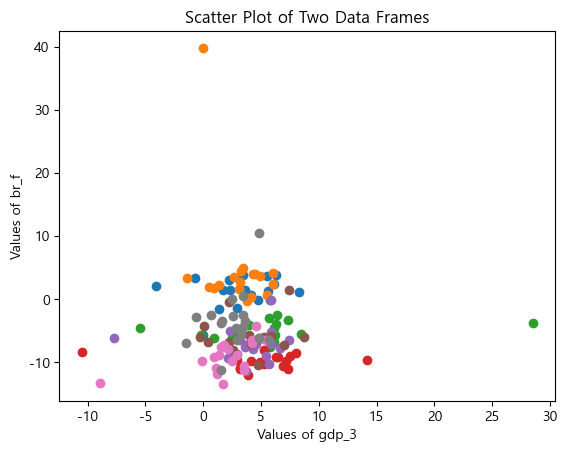

In [23]:
for year in years:
    plt.scatter(gdp_3[str(year)], br_f[str(year+2)])
    
# add labels and title
plt.xlabel('Values of gdp_3')
plt.ylabel('Values of br_f')
plt.title('Scatter Plot of Two Data Frames')

# show the plot
plt.show()

In [103]:
pop = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-12\\br_t.csv", index_col=[0], header = 0)
pop








2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
시군구별                                                                         
전국       1.297  1.187  1.205  1.239  1.172  1.052  0.977  0.918  0.837  0.808
서울특별시    1.059  0.968  0.983  1.001  0.940  0.836  0.761  0.717  0.642  0.626
부산광역시    1.135  1.049  1.090  1.139  1.095  0.976  0.899  0.827  0.747  0.728
대구광역시    1.217  1.127  1.169  1.216  1.186  1.067  0.987  0.932  0.807  0.785
인천광역시    1.301  1.195  1.212  1.216  1.144  1.007  1.006  0.940  0.829  0.778
광주광역시    1.295  1.170  1.199  1.207  1.168  1.053  0.972  0.913  0.811  0.896
대전광역시    1.315  1.234  1.250  1.277  1.192  1.075  0.952  0.883  0.805  0.810
울산광역시    1.481  1.391  1.437  1.486  1.418  1.261  1.131  1.084  0.984  0.940
세종특별자치시  1.597  1.435  1.354  1.893  1.821  1.668  1.566  1.472  1.277  1.277
경기도      1.355  1.226  1.241  1.272  1.194  1.069  1.002  0.943  0.878  0.853
강원도      1.374  1.249  1.248  1.311  1.237  1.123  1.067  1.082  1.036  0.979
충청북도     1.485  1.365  1.363  1.414  1.358  1.235  1.172  1.050  0.983  0.949
충청남도     1.571  1.442  1.421  1.480  1.395  1.276  1.186  1.112  1.029  0.963
전라북도     1.440  1.320  1.329  1.352  1.251  1.151  1.044  0.971  0.909  0.850
전라남도     1.642  1.518  1.497  1.549  1.466  1.325  1.240  1.234  1.145  1.017
경상북도     1.489  1.379  1.408  1.464  1.396  1.256  1.167  1.089  1.003  0.966
경상남도     1.503  1.367  1.409  1.437  1.358  1.227  1.122  1.046  0.945  0.903
제주특별자치도  1.598  1.427  1.481  1.477  1.432  1.305  1.220  1.145  1.021  0.951

In [104]:
## i don't need to do this since there is the data for percent change

# pct_c=pop.pct_change(axis='columns', periods=1)
# pct_c= pct_c*100

# pct_c


In [106]:
#pct_c.info()

In [27]:
data = {
    'Region': ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'],
    2011: [1.5, 1.6, 1.7, 1.8, 1.9],
    2012: [1.6, 1.7, 1.8, 1.9, 2.0],
    2013: [1.7, 1.8, 1.9, 2.0, 2.1],
    2014: [1.8, 1.9, 2.0, 2.1, 2.2],
    2015: [1.9, 2.0, 2.1, 2.2, 2.3],
    2016: [2.0, 2.1, 2.2, 2.3, 2.4],
    2017: [2.1, 2.2, 2.3, 2.4, 2.5],
    2018: [2.2, 2.3, 2.4, 2.5, 2.6],
    2019: [2.3, 2.4, 2.5, 2.6, 2.7],
    2020: [2.4, 2.5, 2.6, 2.7, 2.8],
    2021: [2.5, 2.6, 2.7, 2.8, 2.9]
}
df = pd.DataFrame(data)
df.set_index('Region', inplace=True)

In [28]:
df

2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
Region                                                                   
Seoul     1.5   1.6   1.7   1.8   1.9   2.0   2.1   2.2   2.3   2.4   2.5
Busan     1.6   1.7   1.8   1.9   2.0   2.1   2.2   2.3   2.4   2.5   2.6
Daegu     1.7   1.8   1.9   2.0   2.1   2.2   2.3   2.4   2.5   2.6   2.7
Incheon   1.8   1.9   2.0   2.1   2.2   2.3   2.4   2.5   2.6   2.7   2.8
Gwangju   1.9   2.0   2.1   2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9

In [78]:
for year in range(2012, 2021):
    col_name = f'{year}_to_{year+1}'
    df[col_name] = df[year+1].pct_change() * 100

print(df)

KeyError: 2013

In [113]:
pop = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\c_prov_3f.csv", index_col=[0, 1])

print(pop)

                            전국    서울특별시    부산광역시    대구광역시    인천광역시    광주광역시  \
시점   항목                                                                       
2012 합계출산율               1.297    1.059    1.135    1.217    1.301    1.295   
     모의 연령별출산율:15-19세    1.800    1.200    1.600    1.100    1.800    1.900   
     20-24세             16.000    7.900   11.100   12.400   15.600   16.800   
     25-29세             77.400   49.200   59.000   70.000   79.100   78.900   
     30-34세            121.900  108.000  113.900  122.000  120.200  122.000   
     35-39세             39.000   42.000   38.000   35.500   39.600   36.100   
     40-44세              4.900    5.400    4.600    3.800    5.000    4.500   
     45-49세              0.200    0.200    0.200    0.100    0.200    0.200   
2013 합계출산율               1.187    0.968    1.049    1.127    1.195    1.170   
     모의 연령별출산율:15-19세    1.700    1.200    1.800    1.600    1.700    1.700   
     20-24세             14.000    7.100   10.900   1

In [114]:
pop_34 = pop.loc[(slice(None), '30-34세'), :]


In [81]:
print(pop_34)

print(pop_34.info())



                전국  서울특별시  부산광역시  대구광역시  인천광역시  광주광역시  대전광역시  울산광역시  세종특별자치시  \
시점   항목                                                                        
2012 30-34세  121.9  108.0  113.9  122.0  120.2  122.0  122.7  139.9    141.9   
2013 30-34세  111.4   96.9  102.5  113.1  111.2  109.7  115.4  132.7    127.4   
2014 30-34세  113.8   98.5  107.7  114.7  113.6  112.3  118.0  135.0    120.3   
2015 30-34세  116.7  100.4  110.0  120.3  113.2  113.2  120.6  142.1    169.7   
2016 30-34세  110.1   93.3  105.8  115.9  105.8  107.1  111.3  132.9    160.7   
2017 30-34세   97.7   81.3   92.3  104.0   92.0   95.9   98.8  117.8    153.2   
2018 30-34세   91.4   73.8   86.5   96.1   92.3   91.4   88.6  106.7    143.7   
2019 30-34세   86.2   68.2   79.3   91.3   87.0   85.7   82.0  107.0    139.8   
2020 30-34세   78.9   60.3   72.5   79.6   76.9   75.9   76.1   99.4    128.0   
2021 30-34세   76.1   57.6   69.8   76.8   71.0   86.1   76.6   95.1    128.1   

               경기도    강원도   충청북도   충청남도

In [115]:
pop_34 = pop_34.dropna()
pop_34 = pop_34.astype(float)
pop_34.columns = pop_34.columns.astype(str)

pop_34 = pop_34.apply(pd.to_numeric, errors='coerce')

#print(pop_34.shape)

#pop_34.info()

pop_f= pop_34.T
print(pop_f)

시점        2012   2013   2014   2015   2016   2017   2018   2019   2020   2021
항목      30-34세 30-34세 30-34세 30-34세 30-34세 30-34세 30-34세 30-34세 30-34세 30-34세
전국       121.9  111.4  113.8  116.7  110.1   97.7   91.4   86.2   78.9   76.1
서울특별시    108.0   96.9   98.5  100.4   93.3   81.3   73.8   68.2   60.3   57.6
부산광역시    113.9  102.5  107.7  110.0  105.8   92.3   86.5   79.3   72.5   69.8
대구광역시    122.0  113.1  114.7  120.3  115.9  104.0   96.1   91.3   79.6   76.8
인천광역시    120.2  111.2  113.6  113.2  105.8   92.0   92.3   87.0   76.9   71.0
광주광역시    122.0  109.7  112.3  113.2  107.1   95.9   91.4   85.7   75.9   86.1
대전광역시    122.7  115.4  118.0  120.6  111.3   98.8   88.6   82.0   76.1   76.6
울산광역시    139.9  132.7  135.0  142.1  132.9  117.8  106.7  107.0   99.4   95.1
세종특별자치시  141.9  127.4  120.3  169.7  160.7  153.2  143.7  139.8  128.0  128.1
경기도      126.4  115.3  117.4  119.8  113.1  100.6   94.7   89.3   83.3   81.2
강원도      117.2  106.5  108.4  114.6  107.8   95.6   91.5   96.6 

In [83]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)



In [116]:
import pandas as pd

In [117]:

pop = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-17\\br_1421_seoul.csv", index_col=[0, 1], header=[0, 1])


pop= pop.droplevel(level=0, axis =1)
#print(pop)

pop_T = pop.T
#print(pop_T)

#print(pop_T.iloc[4:: , ])

#print(pop_T.iloc[5])

s = pop_T.iloc[5]
#type(s)

s= s.to_frame()
#type(s)



s.index.names= ['Year', '자치구']


print(s)

dfs = []

for year in range(2014, 2022):
    dfs.append(s.xs(year, level='Year'))

result = pd.concat(dfs, axis=1)

print(result)


result['mean']= result.mean(axis=1).round(2)

#print(result)


result = result.assign(**{str(year): pd.Series(dtype=float) for year in range(2014, 2022)})
print(result)

# pop_t_s= pop_T.stack(level = 1)


# pop_t_s= pop_t_s.sort_index(axis=1)






# #print("------------")
# pop_swapped = pop.swaplevel(0, 1, axis=0)
# #print(pop_swapped)


# #print("-------------")
# #print("-----------")
# #print(pop_swapped.unstack(level=1))


# pop_swapped_t= pop_swapped.T

# print(pop_swapped_t)

# pop_s2 = pop_swapped_t.unstack(level= 0)
# pop_s3 = pop_s2.swaplevel(0, 1, axis=1)


# (pop_s3.)



           35-39세
Year 자치구         
2014 서울특별시   45.8
     종로구     43.6
     중구      49.2
     용산구     50.3
     성동구     49.0
     광진구     40.9
     동대문구    43.3
     중랑구     43.2
     성북구     44.1
     강북구     43.3
     도봉구     42.8
     노원구     44.2
     은평구     45.7
     서대문구    44.7
     마포구     44.3
     양천구     42.4
     강서구     47.0
     구로구     50.5
     금천구     46.6
     영등포구    48.6
     동작구     53.0
     관악구     41.8
     서초구     49.2
     강남구     42.8
     송파구     47.1
     강동구     48.2
2015 서울특별시   49.6
     종로구     45.1
     중구      49.6
     용산구     53.2
     성동구     55.6
     광진구     46.6
     동대문구    46.9
     중랑구     51.6
     성북구     47.1
     강북구     42.8
     도봉구     45.9
     노원구     47.1
     은평구     46.3
     서대문구    46.9
     마포구     49.4
     양천구     46.7
     강서구     54.6
     구로구     56.2
     금천구     53.0
     영등포구    56.0
     동작구     55.7
     관악구     43.8
     서초구     52.0
     강남구     46.6
     송파구     49.3
     강동구     51.4
2016 서울특별시   49.8
     종로구  

In [88]:
pop.iloc[4::]

시점             소계 15-19세  20-24세  25-29세  30-34세  35-39세  40-44세 45-49세
Year 자치구                                                               
2014 성동구    1.027    0.5     5.4    37.5   108.5    49.0     5.7      -
     광진구    0.895    0.7     6.1    33.8    93.6    40.9     4.8    0.3
     동대문구   0.914    1.1     6.1    36.1    90.8    43.3     6.0    0.1
     중랑구    1.006    1.4     9.4    43.6    97.7    43.2     6.7      -
     성북구    0.949    1.5     6.7    37.3    93.8    44.1     5.9    0.2
     강북구    0.955    1.7    10.1    39.7    91.5    43.3     5.1      -
     도봉구    1.000    0.7     8.4    43.8    98.3    42.8     5.5    0.1
     노원구    1.109    0.4     5.4    50.0   115.0    44.2     5.4    0.1
     은평구    1.028    1.2     8.5    47.9    95.6    45.7     6.5    0.1
     서대문구   0.954    1.0     6.4    37.0    94.5    44.7     6.4      -
     마포구    0.915    1.6     6.4    34.4    90.5    44.3     6.8    0.3
     양천구    1.005    0.5     5.1    41.4   105.2    42.4     4.5    0.2
     강서구    1.064    0.9     9.0    47.3   104.7    47.0     5.7    0.1
     구로구    1.142    1.0     8.7    50.9   112.5    50.5     7.1    0.1
     금천구    1.019    1.1    11.6    44.8    94.2    46.6     5.0    0.1
     영등포구   1.025    0.9     4.9    41.1   105.9    48.6     5.5    0.1
     동작구    1.007    0.5     5.7    35.6   102.3    53.0     5.7    0.2
     관악구    0.834    1.5     8.0    27.8    81.7    41.8     6.6    0.1
     서초구    1.014    0.1     3.2    39.8   106.0    49.2     5.6    0.3
     강남구    0.863    2.5     6.7    31.5    85.7    42.8     5.1    0.1
     송파구    0.996    0.6     5.1    38.9   103.8    47.1     5.7    0.1
     강동구    1.039    0.8     6.4    43.6   103.8    48.2     6.1    0.1
2015 서울특별시  1.001    1.0     6.4    38.1   100.4    49.6     6.0    0.2
     종로구    0.813    0.5     5.8    26.8    79.9    45.1     4.9      -
     중구     0.946    1.1     4.6    34.6    93.0    49.6     7.7    0.6
     용산구    1.005    0.6     5.4    35.4   101.0    53.2     7.8    0.1
     성동구    1.095    0.5     6.2    40.8   109.9    55.6     7.7    0.3
     광진구    0.903    0.6     5.5    32.4    91.2    46.6     6.2      -
     동대문구   0.960    0.6     6.7    35.3    97.0    46.9     6.5      -
     중랑구    1.051    1.1     9.5    39.5   103.4    51.6     6.7    0.1
     성북구    0.991    1.2     5.7    36.8   101.1    47.1     6.3    0.3
     강북구    0.922    1.2    10.9    37.7    86.0    42.8     6.3    0.1
     도봉구    1.010    1.1     7.0    39.9   102.7    45.9     4.9    0.1
     노원구    1.096    0.6     5.2    48.0   113.4    47.1     4.6    0.1
     은평구    1.003    1.1     7.5    44.8    95.0    46.3     5.8    0.2
     서대문구   0.913    1.1     5.2    33.5    88.8    46.9     7.0      -
     마포구    0.986    3.1     5.2    38.0    96.6    49.4     6.8    0.2
     양천구    1.034    0.5     5.6    42.8   106.6    46.7     4.3      -
     강서구    1.129    0.8     8.4    48.4   110.6    54.6     5.5    0.1
     구로구    1.169    1.3     8.4    46.6   117.6    56.2     6.6    0.1
     금천구    1.086    2.5    10.1    43.7   104.1    53.0     4.9    0.2
     영등포구   1.085    0.3     6.2    40.1   110.7    56.0     6.1    0.2
     동작구    1.012    0.6     6.4    32.8   102.2    55.7     6.5    0.3
     관악구    0.833    1.4     7.4    25.7    83.1    43.8     6.2    0.1
     서초구    1.012    0.1     2.9    36.0   106.4    52.0     6.7    0.3
     강남구    0.857    2.0     4.0    29.5    84.6    46.6     6.6    0.2
     송파구    1.008    0.6     5.5    40.2   103.6    49.3     5.1    0.1
     강동구    1.036    0.9     6.3    40.6   104.3    51.4     5.3    0.3
2016 서울특별시  0.940    0.9     5.4    33.3    93.3    49.8     6.3    0.2
     종로구    0.784      -     4.4    26.1    69.0    51.3     5.8      -
     중구     0.974    1.2     5.4    34.7    87.6    59.3     8.5    0.2
     용산구    0.907    0.4     4.5    29.5    93.4    48.7     6.4    0.2
     성동구    1.013    0.6     4.7    32.8   102.7    55.6     7.7    0.2
     광진구    0.867    0.4     4.1    31.0

In [89]:
pop_34.info()

pop_34.index = pd.to_datetime(pop_34.index)  



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (2012, '30-34세') to (2021, '30-34세')
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전국       10 non-null     float64
 1   서울특별시    10 non-null     float64
 2   부산광역시    10 non-null     float64
 3   대구광역시    10 non-null     float64
 4   인천광역시    10 non-null     float64
 5   광주광역시    10 non-null     float64
 6   대전광역시    10 non-null     float64
 7   울산광역시    10 non-null     float64
 8   세종특별자치시  10 non-null     float64
 9   경기도      10 non-null     float64
 10  강원도      10 non-null     float64
 11  충청북도     10 non-null     float64
 12  충청남도     10 non-null     float64
 13  전라북도     10 non-null     float64
 14  전라남도     10 non-null     float64
 15  경상북도     10 non-null     float64
 16  경상남도     10 non-null     float64
 17  제주특별자치도  10 non-null     float64
dtypes: float64(18)
memory usage: 2.3+ KB


TypeError: <class 'tuple'> is not convertible to datetime

In [ ]:
pop_1= pop_34.droplevel(1)

In [ ]:
pop_1

In [ ]:

df = pop_1.loc[:, '서울특별시'].to_frame()

df.plot(kind='line', y='서울특별시', 
        xlabel='year', 
        ylabel='births per 1,000 females',
       title = '서울시 출산율')

plt.show()


In [90]:


df = pop_1.loc[:, '서울특별시'].to_frame()

for col in pop_1.columns:
    df = pop_1.loc[:, col].to_frame()
    df.plot(kind='line', y=col, xlabel='year', ylabel='births per 1,000 females', title='{} 출산율'.format(col))
    plt.show()


NameError: name 'pop_1' is not defined

In [91]:

df = pop_1.loc[:, '서울특별시'].to_frame()

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for idx, col in enumerate(pop_1.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    df = pop_1.loc[:, col].to_frame()
    df.plot(kind='line', y=col, ax=axs[row_idx, col_idx], xlabel='year', ylabel='births per 1,000 females', title='{} 출산율'.format(col))

fig.suptitle('Birth Rates by Region. 30-34세', fontsize=20)

plt.tight_layout()

plt.show()


NameError: name 'pop_1' is not defined

In [ ]:
####################### 보육교사 1인당 아동수


In [108]:

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


cc = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-14\\jsy\\ratio_daycare.csv", index_col = [0, 1, 2], header=[0])
#print(cc)

cc_r = cc["보육교사 1인당 아동수"]
cc_r= cc_r.droplevel(1, axis =0)


cc_r = cc_r.to_frame()

cc_r = cc_r.T

display(cc_r)

cc_r.info()

print(cc_r[2022])



#cc_r= cc_r[2018]



#cc_r.sort_values(by='보육교사 1인당 아동수', axis=1, inplace=True)

#print(cc_r)

#ax = cc_r.plot.bar()



#ax.set_title('서울시 보육교사 1인당 아동수')
#ax.set_xlabel('자치구명')
#ax.set_ylabel('보육교사 1인당 아동수')

# show the plot
#plt.show()

print(cc_r[2022, "송파"])

통계연도         2022                                                              \
자치구명            계   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포  서대문   
보육교사 1인당 아동수  4.4  4.6  4.1  4.4  4.6  4.3  4.2  4.6  4.8  4.5  4.6  4.2  4.6   

통계연도                                                                           \
자치구명           강동   은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로   
보육교사 1인당 아동수  4.8  4.5  4.0  4.4  4.9  4.4  4.5  4.8  4.4  4.4  4.4  3.9  3.6   

통계연도         2021                                                              \
자치구명          서대문   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포   
보육교사 1인당 아동수  4.9  5.2  4.8  4.4  4.7  4.9  4.8  4.5  4.8  5.1  4.9  5.1  4.6   

통계연도                                                                           \
자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계   
보육교사 1인당 아동수  4.8  4.3  4.8  5.3  4.7  4.8  5.0  4.7  4.6  4.7  4.1  4.0  4.8   

통계연도         2020                                                              \
자치구명           마포   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천  서대문   
보육교사 1인당 아동수  4.9  5.5  5.1  4.7  5.0  5.2  5.0  4.8  5.2  5.3  5.2  5.3  5.3   

통계연도                                                                           \
자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계   
보육교사 1인당 아동수  5.0  4.6  5.1  5.4  4.9  5.0  5.2  5.0  4.9  5.0  4.3  4.3  5.0   

통계연도         2019                                                              \
자치구명           중구   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   종로   
보육교사 1인당 아동수  4.7  5.8  5.5  5.2  5.4  5.7  5.5  5.4  5.5  5.9  5.6  5.7  4.7   

통계연도                                                                           \
자치구명           마포    계  서대문   은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   
보육교사 1인당 아동수  5.5  5.5  5.6  5.5  5.0  5.4  5.9  5.3  5.5  5.6  5.3  5.4  5.5   

통계연도         2018                                                              \
자치구명          서대문    계   종로   중구   용산   성동   광진  동대문   중랑   성북   강북   도봉   노원   
보육교사 1인당 아동수  5.8  5.7  5.1  5.0  5.6  5.7  5.6  5.6  5.7  5.5  5.9  5.5  5.3   

통계연도                                                                           \
자치구명           은평   마포   양천   강서   구로   금천  영등포   동작   관악   서초   강남   송파   강동   
보육교사 1인당 아동수  5.9  5.7  6.0  5.8  6.1  5.8  5.6  5.7  5.8  5.7  5.5  5.7  5.9   

통계연도         2017                                                              \
자치구명            계   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포   
보육교사 1인당 아동수  5.7  5.9  5.8  5.6  5.7  5.7  5.9  5.6  5.9  6.2  6.0  5.9  5.7   

통계연도                                                                           \
자치구명          서대문   은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로   
보육교사 1인당 아동수  5.7  5.8  5.3  5.6  6.0  5.5  5.8  5.8  5.5  5.6  5.8  5.2  5.2   

통계연도         2016                                                              \
자치구명          서대문   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포   
보육교사 1인당 아동수  5.9  6.1  5.9  5.8  6.1  6.0  6.1  5.8  6.0  6.5  6.1  6.3  5.9   

통계연도                                                                           \
자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계   
보육교사 1인당 아동수  6.1  5.6  5.8  6.3  5.6  6.0  6.0  5.8  5.9  6.1  5.2  5.4  6.0   

통계연도         2015                                                              \
자치구명           마포   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천  서대문   
보육교사 1인당 아동수  6.0  6.2  6.1  5.9  6.2  6.2  6.0  6.1  6.2  6.5  6.3  6.5  5.9   

통계연도                                                                           \
자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계   
보육교사 1인당 아동수  6.3  5.7  5.9  6.4  5.8  6.2  6.2  5.7  6.0  6.3  5.5  5.6  6.1   

통계연도         2014                                                              \
자치구명           

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 보육교사 1인당 아동수 to 보육교사 1인당 아동수
Columns: 234 entries, (2022, '계') to (2014, '용산')
dtypes: float64(234)
memory usage: 1.8+ KB
자치구명            계   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포  서대문  \
보육교사 1인당 아동수  4.4  4.6  4.1  4.4  4.6  4.3  4.2  4.6  4.8  4.5  4.6  4.2  4.6   

자치구명           강동   은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로  
보육교사 1인당 아동수  4.8  4.5  4.0  4.4  4.9  4.4  4.5  4.8  4.4  4.4  4.4  3.9  3.6  
보육교사 1인당 아동수    4.6
Name: (2022, 송파), dtype: float64


In [109]:
cc = cc_r[2014].T.sort_values('자치구명')

print(cc)






      보육교사 1인당 아동수
자치구명              
강남             6.1
강동             6.6
강북             6.8
강서             6.7
계              6.5
관악             6.6
광진             6.1
구로             6.9
금천             6.5
노원             6.2
도봉             6.4
동대문            6.7
동작             6.6
마포             6.6
서대문            6.3
서초             6.8
성동             6.4
성북             6.2
송파             6.5
양천             6.8
영등포            6.5
용산             6.6
은평             6.6
종로             5.7
중구             5.8
중랑             6.5


In [110]:



for i in range(2014, 2022):
    year_str = str(i)
    cc_r[year_str].T.reset_index().sort_values('자치구명')
    
    

KeyError: '2014'

In [95]:
import pandas as pd

# create two sample DataFrames
df1 = pd.DataFrame({2014: ['A', 'B', 'C', 'D'],
                    'value1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value2': [5, 6, 7, 8]})

# merge the DataFrames on the 'key' column
merged_df = pd.merge(df1, df2, on='key')

# print the merged DataFrame
print(merged_df)

KeyError: 'key'

In [137]:
#cc_r child care ratio
## 보육교사 1인당 아동수 2014-2021 평균. 서울 구별

merged_df = pd.DataFrame()

### 이부분 중요함
df1 = cc_r.loc[:, [2014]].T
df1 = df1.unstack(level=0)

merged_df = df1 

for year in range(2015, 2022):
    #select the row for the current year and transpose it

    df1 = cc_r.loc[: ,[year]].T
    df1 = df1.unstack(level=0)
    merged_df  = pd.merge(merged_df, df1, left_index = True, right_index = True)
    

    
merged_df['보육교사 1인당 아동수', '2014-2021 평균'] = merged_df.mean(axis = 1).round(2)

merged_df = merged_df.sort_values(by=('보육교사 1인당 아동수' , '2014-2021 평균'))

merged_df = merged_df.drop(index = '계')

merged_df

for i in range(len(merged_df.index)):
    merged_df.index.values[i] = merged_df.index.values[i] + '구'
#print(merged_df)

merged_df.rename(index = {'중구구': "중구"}, inplace = True)

print(merged_df)
#df2 = cc_r.loc[:, [2016]].T
    
# append the row to the merged DataFrame


#merged_df = pd.concat([merged_df, row_df], axis=1)

#print(merged_df)

#merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

#print(merged_df)


# append the original new_df to the merged DataFrame
#merged_df = pd.concat([merged_df, new_df], axis=1)

# print the merged DataFrame
#print(merged_df)

     보육교사 1인당 아동수                                                
통계연도         2014 2015 2016 2017 2018 2019 2020 2021 2014-2021 평균
자치구명                                                             
중구            5.8  5.5  5.2  5.2  5.0  4.7  4.3  4.1         4.97
종로구           5.7  5.6  5.4  5.2  5.1  4.7  4.3  4.0         5.00
노원구           6.2  5.7  5.6  5.3  5.3  5.0  4.6  4.3         5.25
강남구           6.1  5.9  5.8  5.6  5.5  5.2  4.7  4.4         5.40
성북구           6.2  5.8  5.6  5.5  5.5  5.3  4.9  4.7         5.44
광진구           6.1  5.7  5.8  5.5  5.6  5.3  5.0  4.7         5.46
영등포구          6.5  6.1  5.8  5.6  5.6  5.4  4.8  4.5         5.54
성동구           6.4  6.0  5.9  5.6  5.7  5.4  4.9  4.6         5.56
도봉구           6.4  5.9  5.8  5.6  5.5  5.4  5.1  4.8         5.56
마포구           6.6  6.0  5.9  5.7  5.7  5.5  4.9  4.6         5.61
송파구           6.5  6.1  5.9  5.8  5.7  5.5  5.1  4.8         5.68
서대문구          6.3  5.9  5.9  5.7  5.8  5.6  5.3  4.9         5.68
중랑구       

In [97]:
type(merged_df)

pandas.core.frame.DataFrame

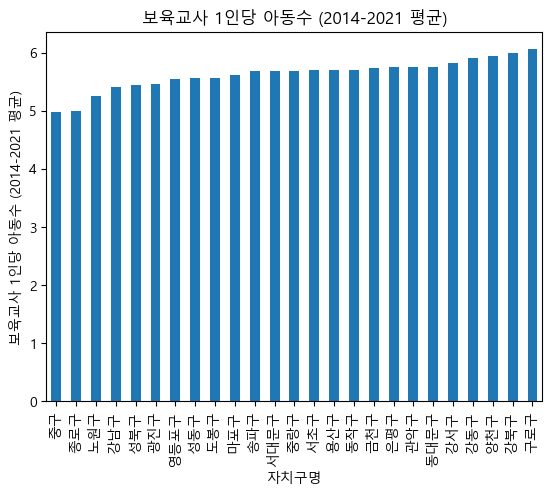

In [138]:
##*** 보육교사 1인당 아동수 2014-2021 평균. 서울 구별

import pandas as pd
import matplotlib.pyplot as plt

# plot the 'mean' column with the row index on the x-axis

s = merged_df['보육교사 1인당 아동수', '2014-2021 평균']

s.plot(kind='bar')


# add labels and title to the plot

plt.xlabel('자치구명')
plt.ylabel('보육교사 1인당 아동수 (2014-2021 평균)')
plt.title('보육교사 1인당 아동수 (2014-2021 평균)')


plt.show()


시점          30-34세
2014 서울특별시    98.5
     종로구      74.4
     중구       98.9
     용산구      92.8
     성동구     108.5
     광진구      93.6
     동대문구     90.8
     중랑구      97.7
     성북구      93.8
     강북구      91.5
     도봉구      98.3
     노원구     115.0
     은평구      95.6
     서대문구     94.5
     마포구      90.5
     양천구     105.2
     강서구     104.7
     구로구     112.5
     금천구      94.2
     영등포구    105.9
     동작구     102.3
     관악구      81.7
     서초구     106.0
     강남구      85.7
     송파구     103.8
     강동구     103.8
2015 서울특별시   100.4
     종로구      79.9
     중구       93.0
     용산구     101.0
     성동구     109.9
     광진구      91.2
     동대문구     97.0
     중랑구     103.4
     성북구     101.1
     강북구      86.0
     도봉구     102.7
     노원구     113.4
     은평구      95.0
     서대문구     88.8
     마포구      96.6
     양천구     106.6
     강서구     110.6
     구로구     117.6
     금천구     104.1
     영등포구    110.7
     동작구     102.2
     관악구      83.1
     서초구     106.4
     강남구      84.6
     송파구     103.6
     강동구    

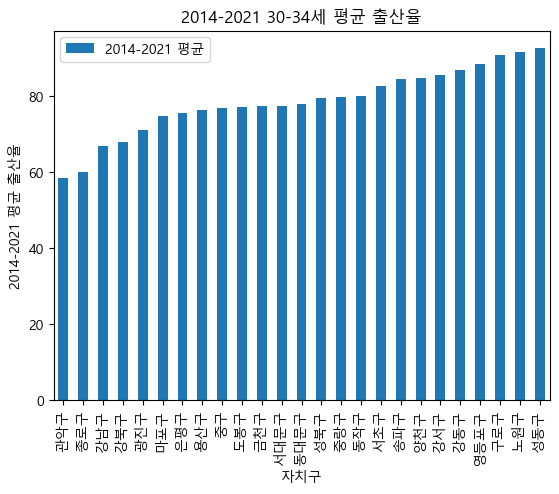

In [139]:

### 서울 구별 출산율 2014-2021.


pop = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-17\\br_1421_seoul.csv", index_col=[0, 1], header=[0, 1])

#print(pop)

pop_f = pop.filter(like='30-34세')

pop_f.columns = pop_f.columns.droplevel(level=0)

print(pop_f)

pop_fi= pop_f.unstack(level=0)


pop_fi['30-34세',"2014-2021 평균"] = pop_fi.mean(axis = 1).round(2)

pop_fi.columns= pop_fi.columns.droplevel(level= 0)

pop_fi= pop_fi.sort_values(by="2014-2021 평균")


pop_fi = pop_fi.drop(index = '서울특별시')
print(pop_fi)


import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

pop_fi.plot.bar(y='2014-2021 평균')


plt.title("2014-2021 30-34세 평균 출산율")
plt.xlabel("자치구") 
plt.ylabel("2014-2021 평균 출산율") 

pop_fi.info()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

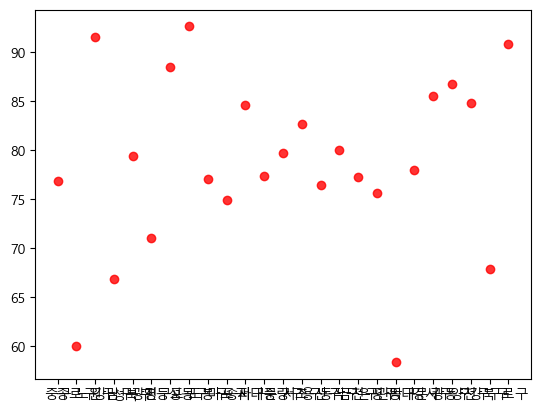

In [140]:
df = pd.concat([merged_df, pop_fi], axis=1)

# ax = sns.regplot(x=df.index, y=df['보육교사 1인당 아동수', '2014-2021 평균'])
# ax.set_xticklabels(df.index, rotation = '90')

# plt.show()


sns.regplot(x=df.index, y=df['2014-2021 평균'], color='r', label='y')

plt.xticks(rotation = 'vertical')
#sns.regplot(x = '보육교사 1인당 아동수, 2014-2021 평균', y = '2014-2021 평균', data = df)



Text(0, 0.5, '2014-2021 30-34세 평균 출산율')

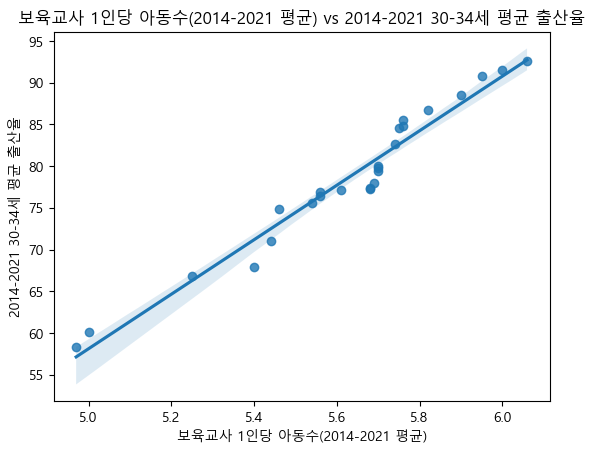

In [133]:
### this is Wrong

# sns.regplot(x=merged_df['보육교사 1인당 아동수', '2014-2021 평균'], y= pop_fi['2014-2021 평균'])
# plt.title("보육교사 1인당 아동수(2014-2021 평균) vs 2014-2021 30-34세 평균 출산율")
# plt.xlabel('보육교사 1인당 아동수(2014-2021 평균)')
# plt.ylabel('2014-2021 30-34세 평균 출산율')



### this is Wrong _ 04_26

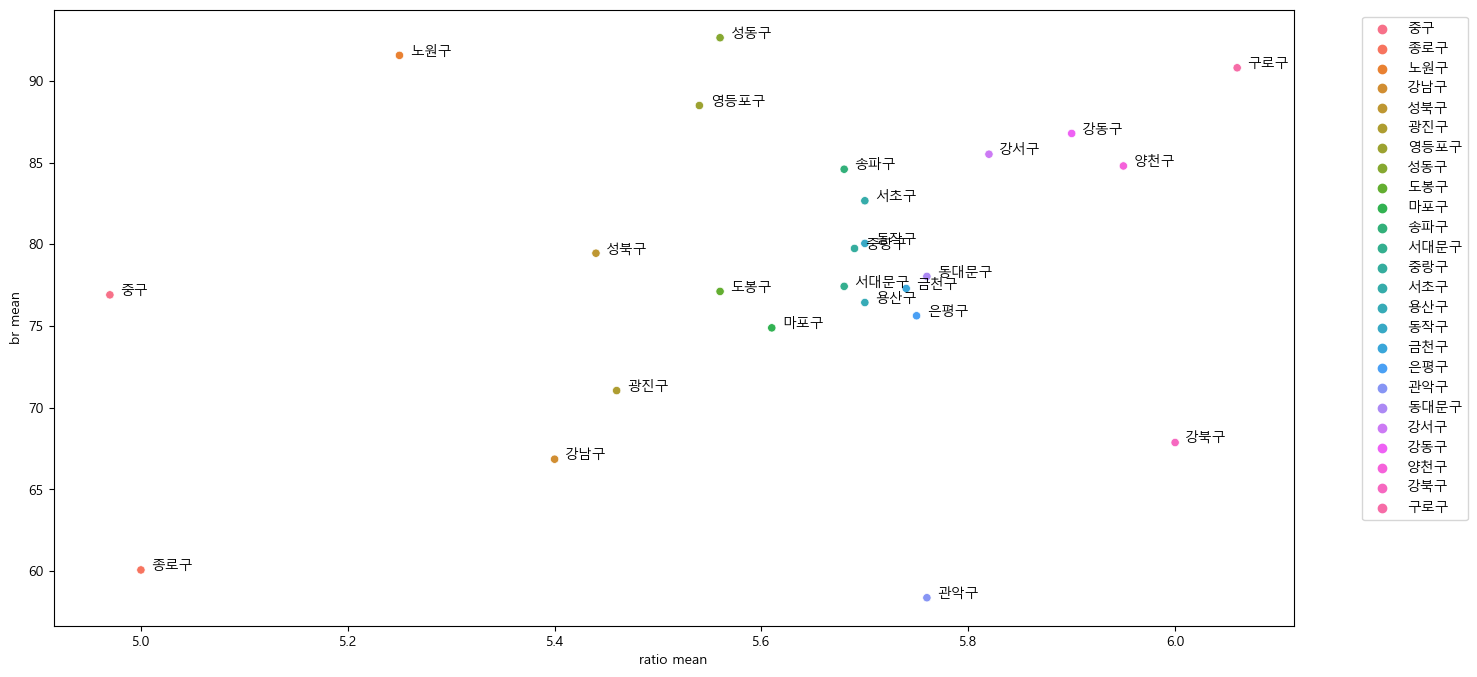

In [143]:
import pandas as pd


# concatenate the dataframes horizontally by index
result = pd.concat([merged_df, pop_fi], axis=1)

# print the result
result
result1 = result.iloc[:, [8, 17]]
result1

result1.columns = ['ratio mean', 'br mean']


result1 = result1.rename_axis('row_index')

result1


result1['row_index'] = result1.index
result1




fig, ax = plt.subplots(figsize=(16,8))

ax =sns.scatterplot(x='ratio mean', y='br mean', data=result1, hue='row_index')



# add a label next to each data point
for i, row in result1.iterrows():
    ax.text(row['ratio mean']+0.01, row['br mean']+0.01, row.name)

    
    
    
    
import matplotlib.pyplot as plt

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# display the plot
plt.show()


In [144]:
#result1.columns = ['ratio mean', 'br mean']


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [147]:
result1

ratio mean  br mean row_index
row_index                               
중구               4.97    76.90        중구
종로구              5.00    60.06       종로구
노원구              5.25    91.56       노원구
강남구              5.40    66.84       강남구
성북구              5.44    79.45       성북구
광진구              5.46    71.04       광진구
영등포구             5.54    88.49      영등포구
성동구              5.56    92.64       성동구
도봉구              5.56    77.11       도봉구
마포구              5.61    74.88       마포구
송파구              5.68    84.59       송파구
서대문구             5.68    77.42      서대문구
중랑구              5.69    79.74       중랑구
서초구              5.70    82.66       서초구
용산구              5.70    76.43       용산구
동작구              5.70    80.05       동작구
금천구              5.74    77.29       금천구
은평구              5.75    75.62       은평구
관악구              5.76    58.36       관악구
동대문구             5.76    78.03      동대문구
강서구              5.82    85.51       강서구
강동구              5.90    86.78       강동구
양천구              5.95    84.79       양천구
강북구              6.00    67.86       강북구
구로구              6.06    90.80       구로구

In [145]:
result1.to_csv('C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-18\\result1.csv')

In [148]:
new_df = cc_r[2014].T

In [149]:
new_df

보육교사 1인당 아동수
자치구명              
중구             5.8
강동             6.6
송파             6.5
강남             6.1
서초             6.8
관악             6.6
동작             6.6
영등포            6.5
금천             6.5
구로             6.9
강서             6.7
양천             6.8
종로             5.7
마포             6.6
계              6.5
서대문            6.3
은평             6.6
노원             6.2
도봉             6.4
강북             6.8
성북             6.2
중랑             6.5
동대문            6.7
광진             6.1
성동             6.4
용산             6.6

In [150]:
import pandas as pd

# create a sample DataFrame with a multi-level row index
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6]}, index=[['A', 'A', 'B', 'B', 'C', 'C'], [2015, 2016, 2015, 2016, 2015, 2016]])

print(df)
# move the first level of the row index to the column index
df = df.unstack(level=0)


print(df)


        values
A 2015       1
  2016       2
B 2015       3
  2016       4
C 2015       5
  2016       6
     values      
          A  B  C
2015      1  3  5
2016      2  4  6


In [151]:

year_groups = cc_r.groupby(level=0)
year_dfs = {year: year_groups.get_group(year).droplevel(level=0, axis=1) for year in year_groups.groups}


print(year_dfs)


for year, year_df in year_dfs.items():
    print(f'Year {year}:')
    print(year_df)
    print()

{'보육교사 1인당 아동수': 자치구명            계   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포  서대문  \
보육교사 1인당 아동수  4.4  4.6  4.1  4.4  4.6  4.3  4.2  4.6  4.8  4.5  4.6  4.2  4.6   

자치구명           강동   은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로  \
보육교사 1인당 아동수  4.8  4.5  4.0  4.4  4.9  4.4  4.5  4.8  4.4  4.4  4.4  3.9  3.6   

자치구명          서대문   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천   마포  \
보육교사 1인당 아동수  4.9  5.2  4.8  4.4  4.7  4.9  4.8  4.5  4.8  5.1  4.9  5.1  4.6   

자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계  \
보육교사 1인당 아동수  4.8  4.3  4.8  5.3  4.7  4.8  5.0  4.7  4.6  4.7  4.1  4.0  4.8   

자치구명           마포   강동   송파   강남   서초   관악   동작  영등포   금천   구로   강서   양천  서대문  \
보육교사 1인당 아동수  4.9  5.5  5.1  4.7  5.0  5.2  5.0  4.8  5.2  5.3  5.2  5.3  5.3   

자치구명           은평   노원   도봉   강북   성북   중랑  동대문   광진   성동   용산   중구   종로    계  \
보육교사 1인당 아동수  5.0  4.6  5.1  5.4  4.9  5.0  5.2  5.0  4.9  5.0  4.3  4.3  5.0   

자치구명 

In [152]:
se_br = pd.read_csv("C:\\Users\\acorn\\TEAM_PROJECT\\2023-04-14\\seoul_br_2.csv", index_col = [0], header=[0, 1, 2])

se_br
se_br.drop('서울특별시', inplace = True)
se_br
result = se_br.loc[:, (slice(None), slice(None), '30-34세')]
print(result)
print(type(result))







#se_br = se_br.iloc[: : 3]



# se_br.sort_values(by ='소계', inplace = True)

# se_br = se_br['소계']

# se_br = se_br.to_frame()

# type(se_br)
# print(se_br)


# ax = se_br.plot.bar()


# ax.set_title('서울시 출산율')
# ax.set_xlabel('자치구명')
# ax.set_ylabel('출산율')

# # show the plot
# plt.show()

자치구별(1)                           2014                           2015  \
자치구별(1) 모(母)의 연령별 출산율(연령별 여성 천명당 출생아수) 모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)   
자치구별(1)                         30-34세                         30-34세   
종로구                               74.4                           79.9   
중구                                98.9                           93.0   
용산구                               92.8                          101.0   
성동구                              108.5                          109.9   
광진구                               93.6                           91.2   
동대문구                              90.8                           97.0   
중랑구                               97.7                          103.4   
성북구                               93.8                          101.1   
강북구                               91.5                           86.0   
도봉구                               98.3                          102.7   
노원구                              115.0             